# Chapter 7 Ensemble Learning


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y= make_moons(n_samples=500,noise=0.3,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42) 

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf= VotingClassifier( 
        estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],
        voting='hard')
voting_clf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomFo...f', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [5]:
from sklearn.metrics import accuracy_score

for clf in (log_clf,rnd_clf,svm_clf,voting_clf): 
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test) 
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.888


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Bagging and Pasting 

Bagging is also called Bootstrap Aggregation. Bootstrap aggregation is a resampling method. What is bootstrap? It refers to random sampling with replacement. When sampling is performed without replacement, it is called pasting. Bagging is used to reduce variance for some high variance estimators. Bagging allows one instanced to be sampled multiple times for one estimators, pasting allows one instance to be sampled for multiple times for multiple estimators. 

In [6]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1)
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)

## Random Patches and Random Subspaces 
_BaggingClassifier_ supports sampling for features as well. This is particularly helpful when dealing with high-dimensional inputs. 

## Random Forests 

Random Forest is an ensemble of Decision Trees, generally trained via the bagging method. Instead of using _BaggingClassifier_, you can use _RandomForestClassifier_ class. 

In [7]:
from sklearn.ensemble import RandomForestClassifier 
rnd_clf = RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1)
rnd_clf.fit(X_train,y_train) 
y_pred_rf = rnd_clf.predict(X_test)

In [10]:
%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt
import numpy as np
mpl.rc('axes',labelsize = 14) 
mpl.rc('xtick',labelsize = 12)
mpl.rc('ytick',labelsize = 12)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

def plot_dataset(x,y,axes): 
    plt.plot(x[:,0][y==0],x[:,1][y==0],"bs")
    plt.plot(x[:,0][y==1],x[:,1][y==1],'g^')
    plt.axis(axes)
    plt.grid(True,which="both") 
    plt.xlabel(r"$x_1$",fontsize = 20)
    plt.ylabel(r"$x_2$",fontsize = 20, rotation=0)

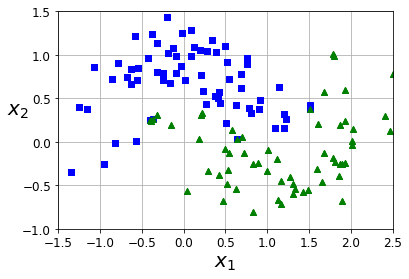

In [15]:
# plot_predictions(bag_clf,[-1.5,2.5,-1,1.5]) 
plot_dataset(X_test,y_test,[-1.5,2.5,-1,1.5])
plot_dataset(X_test,y_pred,[-1.5,2.5,-1,1.5])

In [13]:
y_test

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [16]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random",max_leaf_nodes=16), 
    n_estimators=500, max_samples=1.0,bootstrap=True,n_jobs=-1)

In [17]:
accuracy_score(y_test,y_pred)

0.904

In [18]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [19]:
y_pred_bag = bag_clf.predict(X_test)

In [20]:
accuracy_score(y_test,y_pred_bag)

0.912